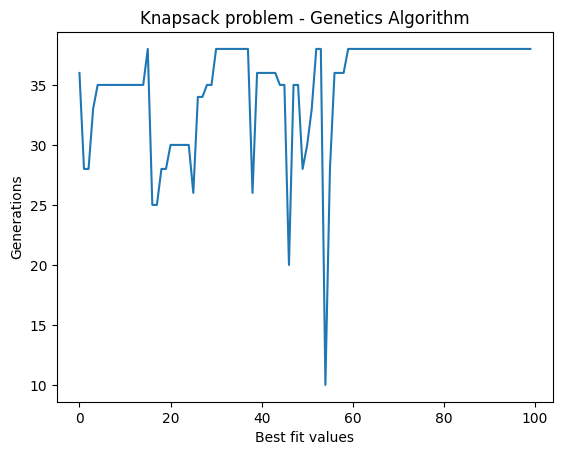

Optimal cost: 38
Optimal solution: [1, 1, 1, 1, 0, 0, 0]


In [3]:
import random

# define the weights, values and knapsack_capacity
weights = [2, 1, 3, 5, 7, 8, 9]
values = [10, 8, 15, 5, 1, 2, 3]
knapsack_capacity = 15

# define pop_size, generations and crossover_rate
pop_size = 10
generations = 100
crossover_rate = 0.8

# define function to initialize the population
def init_pop(size):
    return [
        [random.choice([0,1]) for _ in range(len(weights))]
        for _ in range(size)
    ]

# define the fitness function
def fitness(ind):
    total_weight = sum(w*g for w,g in zip(weights, ind))
    total_value = sum(v*g for v,g in zip(values, ind))

    return total_value if total_weight <= knapsack_capacity else 0

# define the crossover function
def crossover(p1, p2):
    cp = random.randint(1, len(p1) - 1)
    c1 = p1[:cp] + p2[cp:]
    c2 = p1[cp:] + p2[:cp]

    return c1, c2

# define mutate function
def mutate(ind):
    mi = random.randint(0, len(ind) - 1)
    ind[mi] = 1 - ind[mi]
    return ind

# initalize the population
pop = init_pop(pop_size)
# empty list to store best_fit_hist
best_fit_hist = []

# start the genetic algorithms
for generation in range(generations):
    pop = sorted(pop, key=lambda ind: fitness(ind), reverse=True)
    best_ind = pop[0]
    best_fit_hist.append(fitness(best_ind))

    new_pop = [best_ind]
    while len(new_pop) < pop_size:
        p1, p2 = random.choices(pop[:int(0.5 * pop_size)], k=2)
        c1, c2 = crossover(p1, p2) if random.random() < crossover_rate else (p1, p1)

        new_pop.extend([mutate(c1), mutate(c2)])
    pop = new_pop

# plot the graph
import matplotlib.pyplot as plt
plt.plot(range(generations), best_fit_hist)
plt.xlabel("Best fit values")
plt.ylabel("Generations")
plt.title("Knapsack problem - Genetics Algorithm")
plt.show()


# print optimal cost and optimal_sol
print(f"Optimal cost: {fitness(best_ind)}")
print(f"Optimal solution: {best_ind}")
